# Causal Inference: How are a Sephora product's attributes related to each other?

### I.	Framing the problem

As seen in the previous notebook, it would be very interesting for any project manager to understand product's attributes and their relation regression based with their rating in order to decide on how to supply these products and optimize their stocks without geenrating losses.

The aim of this project now will rather be about understand the relationship between attributes of our products. For instance, are products from a specific brands more likely to have a higher price, and how is this affecting ratings? Or maybe that some product that are under a specific category geenrate more "love" units and therefore affect in some way the way they are rated because of that.

This phenomenon is what we have defined as Causal Inference: the process of drawing a conclusion about a causal relationship based on the conditions of the available evidence. The goal of causal inference is to determine whether an action or event (the cause) had an effect on another action or event (the effect).

### II.	Data Acquisition

Our dataset has been obtained from the following Kaggle link: 
https://www.kaggle.com/datasets/raghadalharbi/all-products-available-on-sephora-website

The data dictionary is provided there, explaining the meaning of each of the columns name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unidecode
import seaborn as sns

In [2]:
# read xls file
df = pd.read_csv("sephora_website_dataset.csv")

### III.	Data Exploration

The purpose of this data exploration is to have a better sense of the data we will be working on. 

##### Display the first 5 rows of data

In [3]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


##### Display the shape of the data (number of rows, number of columns)

In [4]:
df.shape

(9168, 21)

##### Display the names of each column

In [5]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [6]:
df["rating"].unique()

array([4. , 4.5, 3.5, 5. , 3. , 0. , 2.5, 2. , 1. , 1.5])

##### Display the summary statistics of the numerical columns

In [7]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


 ### IV.   Data Preparation

Reasons for droping the below variables:

* ID: unecessary for obvious reasons. The ID of a product is an internal identification of the product and will not help predict its rating
* Name: same reason as ID
* Gives infromation VERY similar to 'price' variable, thus creating collinearity, which will be bad for our model.
* URL: same reason as ID
* MarketingFlags_content: Internal information, not available to users and thus not intersting as a predictor
* Options: hard to decript, and same reason as Size
* How to use: Text analysis, intersting for further investigation
* Ingredients: Text analysis, intersting for further investigation

In [8]:
df = df.drop(columns=["id", "name", "value_price", "URL", "MarketingFlags_content", "options", "details", "how_to_use", "ingredients"])

##### Dummifying the MarketingFlags variable

In [9]:
dummy_df = pd.get_dummies(df['MarketingFlags'],prefix='MarketingFlags')
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(columns=['MarketingFlags'])
df = df.drop(columns=['MarketingFlags_False'])

##### Having a look at catgeories...

In [10]:
counts = df['category'].value_counts()
print(counts.head(20))

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
Face Masks                   230
Rollerballs & Travel Size    228
Hair Styling Products        224
Eye Palettes                 202
Lipstick                     191
Eye Creams & Treatments      191
Shampoo                      186
Face Brushes                 183
Highlighter                  169
Foundation                   163
Cologne                      158
Mini Size                    154
Mascara                      154
Conditioner                  147
Candles & Home Scents        144
Name: category, dtype: int64


##### Deleting any observation with a category value that only appears up to 15 times:

In [11]:
# Get the categories that appear only up to 15 times
categories_to_remove = df['category'].value_counts()[df['category'].value_counts() <= 15].index

# Delete observations with a unique category value
df = df[~df['category'].isin(categories_to_remove)]

##### Having a look at brands...

In [12]:
counts2 = df['brand'].value_counts()
print(counts2.head(20))

SEPHORA COLLECTION         448
CLINIQUE                   220
tarte                      168
TOM FORD                   156
Dior                       140
Fresh                      137
Lancôme                    117
Kiehl's Since 1851         116
Bumble and bumble          102
Moroccanoil                 96
Kérastase                   96
Shiseido                    93
MAKE UP FOR EVER            92
Benefit Cosmetics           91
philosophy                  84
FENTY BEAUTY by Rihanna     82
Too Faced                   80
Yves Saint Laurent          77
Givenchy                    76
Living Proof                74
Name: brand, dtype: int64


##### Deleting any observation with a brand value that only appears up to 15 times:

In [13]:
# Get the brands that appear only up to 15 times
brands_to_remove = df['brand'].value_counts()[df['brand'].value_counts() <= 15].index

# Delete observations with a unique category value
df = df[~df['brand'].isin(brands_to_remove)]

In [14]:
df.shape

(7803, 12)

We can see that more than 1,000 observations were discarded from our dataset.

##### Only keep the mL value in size to make it a numerical value

In [15]:
import re

def extract_ml_value(value):
    result = re.search(r'(\d+)\s*mL', value)
    if result:
        return int(result.group(1))
    return None

df['size_ml'] = df['size'].apply(extract_ml_value)

In [16]:
df = df.drop(columns=['size'])

In [17]:
df = df[df['size_ml'] != 'nan']

In [18]:
print(set(df['size_ml'].apply(type)))

{<class 'float'>}


##### Identifying outliers and deleting them:

In [19]:
# Get the z-scores for each column
z = np.abs(df - df.mean()) / df.std()

# Identify outliers (rows with a z-score greater than 3)
outliers = z[z > 3]

# Get the indices of the outlier rows
outlier_indices = outliers.dropna(thresh=1).index

# Delete the outlier rows
df = df.drop(outlier_indices)

/var/folders/n8/y2cbsyh175j4_zxb8gqgkd6w0000gn/T/ipykernel_56333/923032887.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = np.abs(df - df.mean()) / df.std()
/var/folders/n8/y2cbsyh175j4_zxb8gqgkd6w0000gn/T/ipykernel_56333/923032887.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = np.abs(df - df.mean()) / df.std()


In [20]:
df.shape

(6441, 12)

In [21]:
df.nunique()

brand                   167
category                100
rating                    9
number_of_reviews       781
love                   1228
price                   222
online_only               2
exclusive                 2
limited_edition           1
limited_time_offer        1
MarketingFlags_True       2
size_ml                 138
dtype: int64

##### Deleting limited_edition and limited_time_offer

In [22]:
df = df.drop(columns=["limited_edition", "limited_time_offer"])

##### Pre-processing the data 

In [23]:
# Lowercase all the text
df = df.apply(lambda x: x.astype(str).str.lower())

# Remove non-alphanumeric characters
df = df.apply(lambda x: x.astype(str).apply(lambda x: re.sub(r'[^\w\s]','',x)))

# Replace whitespaces and line breaks with a single space
df = df.apply(lambda x: x.astype(str).apply(lambda x: re.sub(r'[\n\r\t]',' ',x)))

# Remove unknown characters
df = df.apply(lambda x: x.astype(str).apply(lambda x: unidecode.unidecode(x)))

In [24]:
df.shape

(6441, 10)

In [25]:
df.head()

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,MarketingFlags_True,size_ml
0,acqua di parma,fragrance,40,4,3002,660,1,0,1,50
1,acqua di parma,cologne,45,76,2700,660,1,0,1,200
2,acqua di parma,perfume,45,26,2600,1800,1,0,1,1480
3,acqua di parma,perfume,45,23,2900,1200,1,0,1,740
4,acqua di parma,fragrance,35,2,943,720,1,0,1,50


In [26]:
df = df[df['size_ml'] != 'nan']

### V. Causal Inference

In [27]:
!pip install causalml

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.dataset.regression import synthetic_data
from sklearn.linear_model import LinearRegression
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor

In [30]:
import shap
import matplotlib.pyplot as plt

import time
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

In [31]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Treatment 1: 'online_only'

We are going to check how the effect of the treatment "online_only" acts on the rest of the variables

##### Define the target, treatment and control variables

In [32]:
X = df
# Define the treatment variable

w_multi = X['online_only']
w_multi = w_multi.to_numpy()
w_multi = w_multi.astype(int)


# Define the outcome variable
y = X['rating']
y = y.to_numpy()
y = y.astype(float)


# Define the covariates
X = X.drop(['rating', 'online_only', 'brand', 'category'], axis=1)
X = X.to_numpy()

#### S Learner

In [33]:
base_algo = LGBMRegressor()
slearner = BaseSRegressor(base_algo, control_name=0)
slearner.estimate_ate(X, w_multi, y)

array([-0.24317993])

In [34]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

#### Feature Importance (method = 'auto')

In [35]:
feature_names = ['number_of_reviews', 'love', 'price',
                 'exclusive', 'MarketingFlags_True', 'size_ml']

In [36]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{1: number_of_reviews      0.440386
 love                   0.303818
 price                  0.164765
 size_ml                0.086429
 MarketingFlags_True    0.002855
 exclusive              0.001746
 dtype: float64}

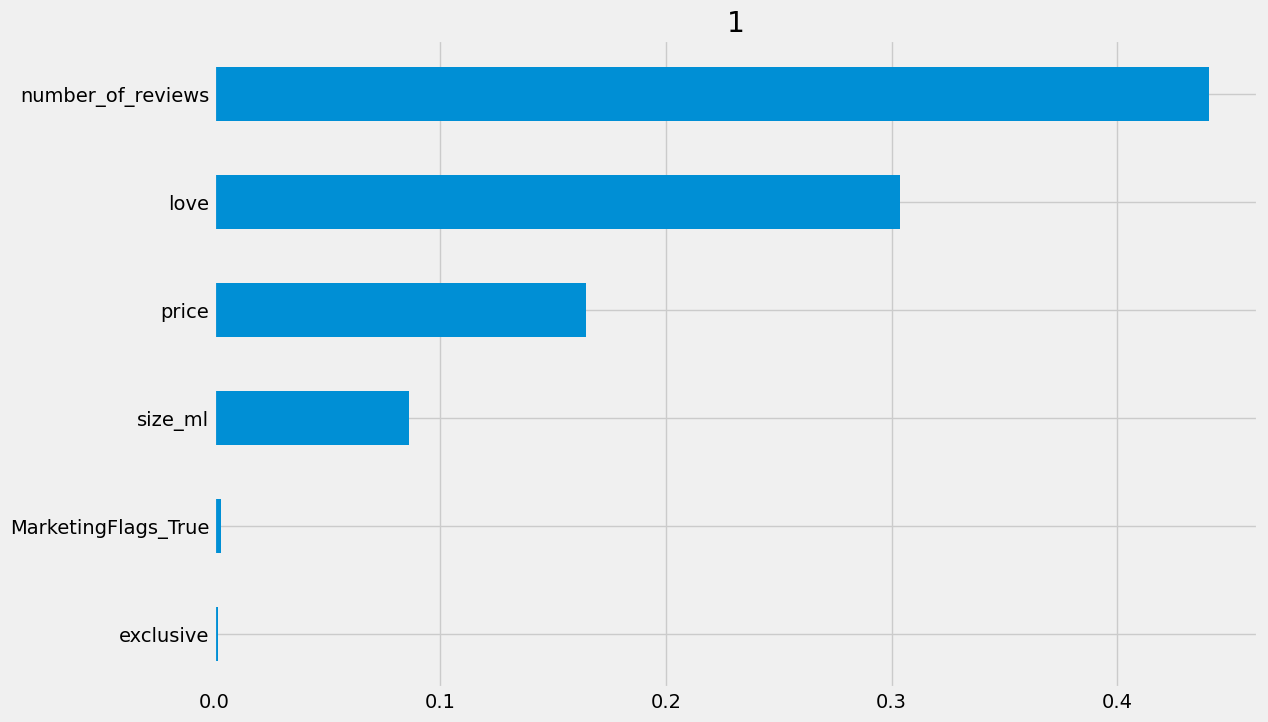

In [37]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### Feature Importance (method = permutation)

In [38]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{1: number_of_reviews      1.055773
 love                   0.636333
 price                  0.331925
 size_ml                0.229806
 exclusive              0.002841
 MarketingFlags_True    0.000841
 dtype: float64}

In [39]:
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.40558886528015137 seconds


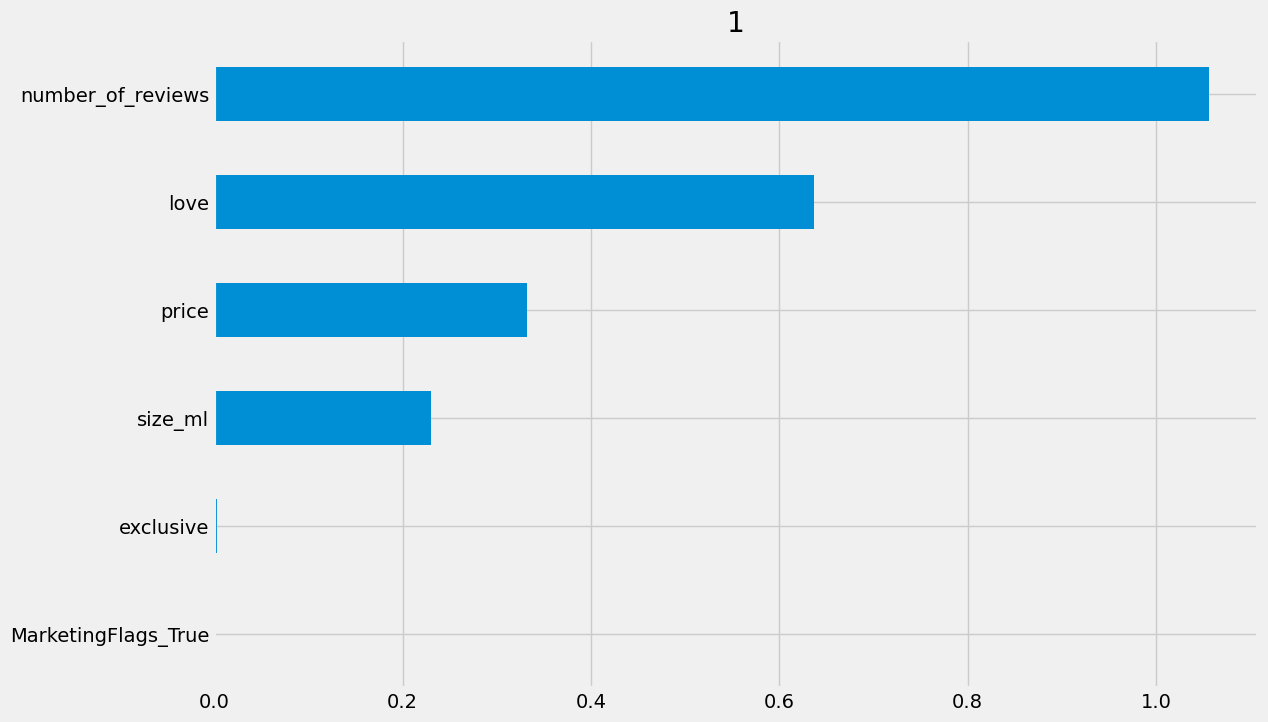

In [40]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Feature Importance (sklearn.inspection.permutation_importance)

In [41]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)

model_tau = LGBMRegressor(importance_type='gain')
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.6279733180999756 seconds


In [42]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

number_of_reviews      1.055773
love                   0.636333
price                  0.331925
size_ml                0.229806
exclusive              0.002841
MarketingFlags_True    0.000841
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

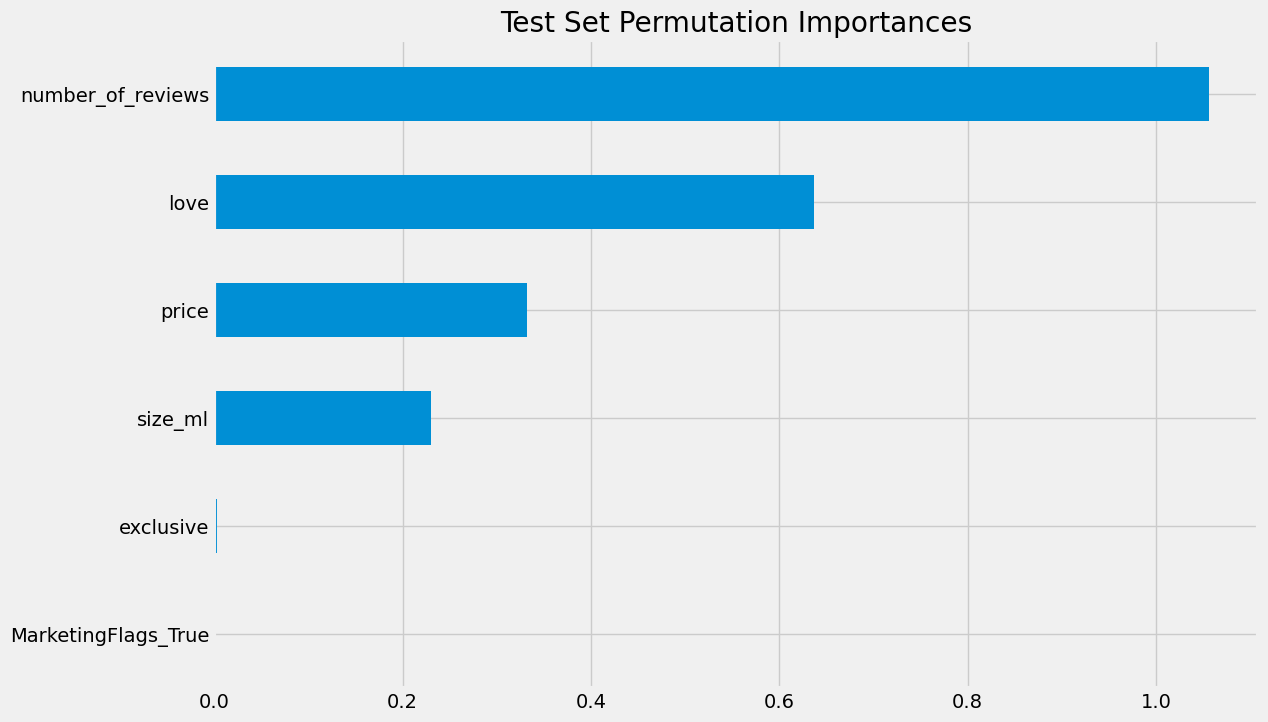

In [43]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [44]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

number_of_reviews      0.984232
love                   0.593003
price                  0.318520
size_ml                0.185660
exclusive              0.002595
MarketingFlags_True    0.001196
dtype: float64

Text(0.5, 1.0, 'Training Set Permutation Importances')

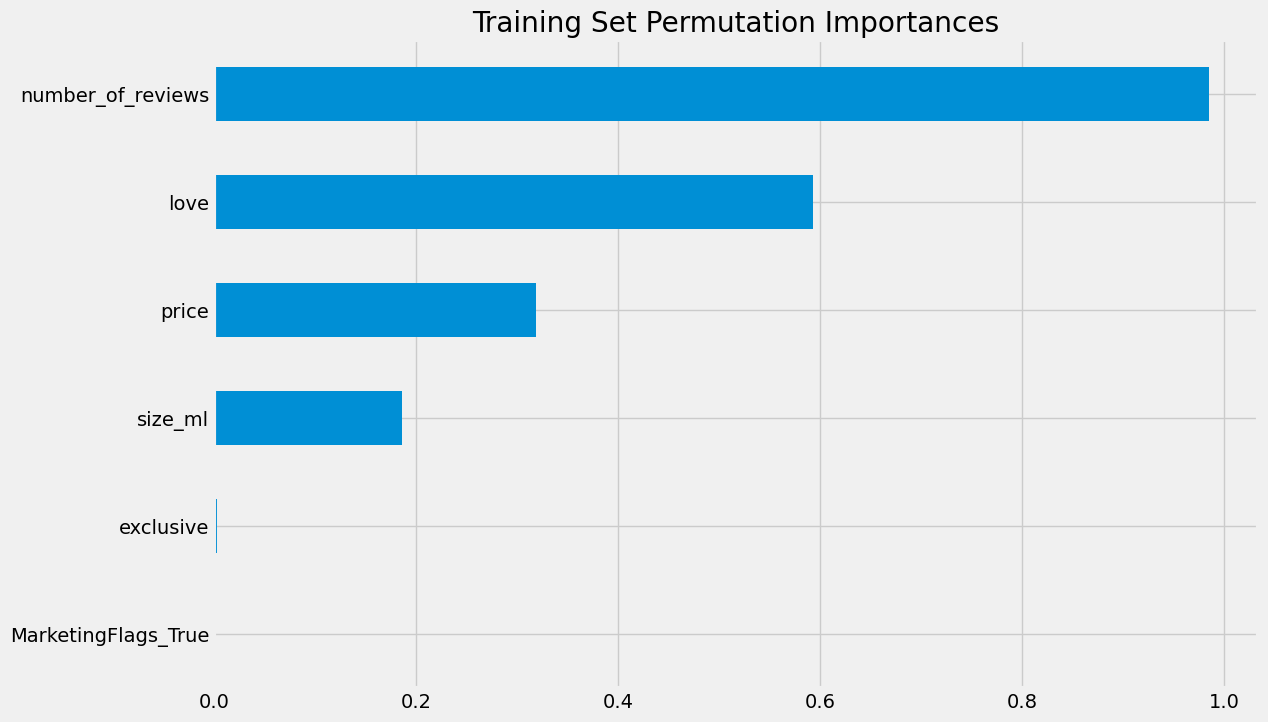

In [45]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Training Set Permutation Importances')

In [46]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{1: array([[-9.97746611e-01,  1.09092824e-01,  1.06461661e-01,
         -1.62565191e-02, -5.08125378e-03, -1.10008610e+00],
        [ 9.89669986e-02,  7.05331135e-02,  1.68465241e-02,
         -3.04599850e-03, -1.90830727e-03,  1.16643142e-01],
        [ 6.61250557e-02,  1.37354974e-01,  5.32356328e-03,
         -2.43485834e-03, -1.98726269e-03,  5.88040122e-02],
        ...,
        [ 1.69549372e-01,  1.19585640e-01, -3.70891426e-02,
          7.94713651e-03, -3.15779961e-05, -7.72482500e-02],
        [ 2.50874418e-01,  1.29517335e-01, -3.72504505e-02,
          4.18648317e-03, -1.12448124e-03, -7.74391262e-03],
        [ 2.34708697e-01,  1.33173271e-01, -5.67091402e-02,
         -4.25863067e-03, -2.62363963e-03,  7.75256966e-03]])}

In [47]:
np.mean(np.abs(shap_slearner[1]),axis=0)

array([0.22497292, 0.20661489, 0.08602214, 0.00758371, 0.00451784,
       0.12512934])

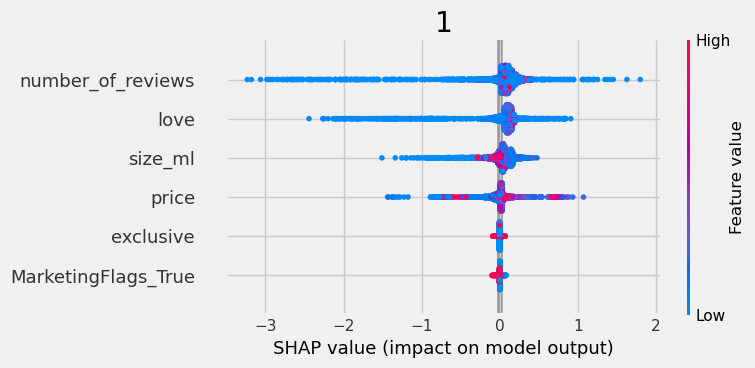

In [48]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

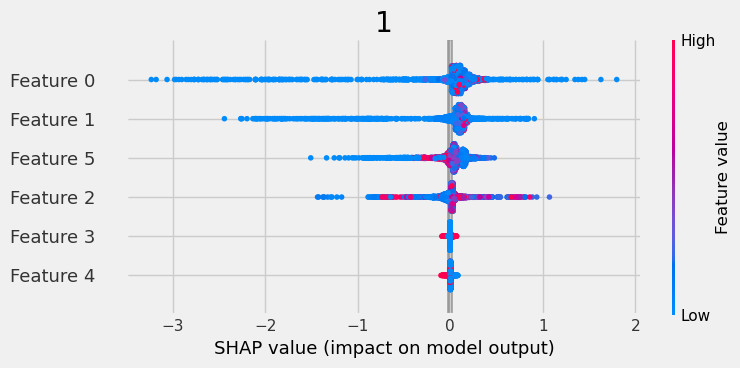

In [49]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

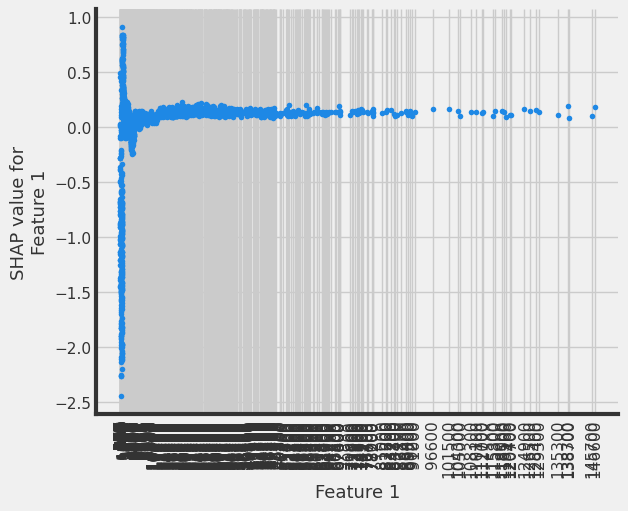

In [50]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

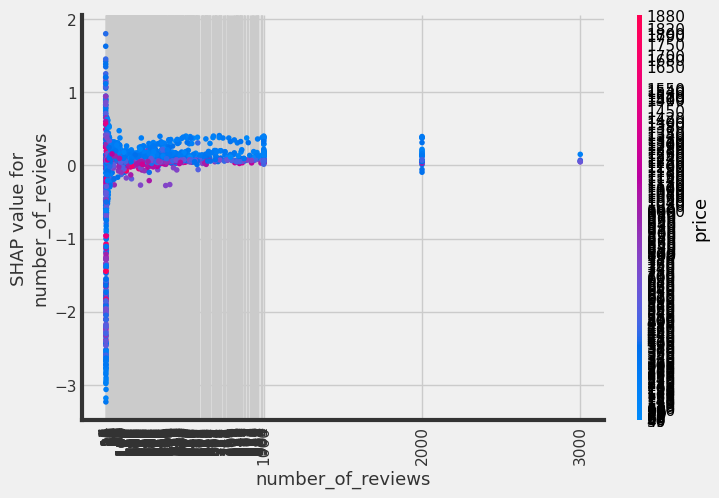

In [51]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx='number_of_reviews',
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

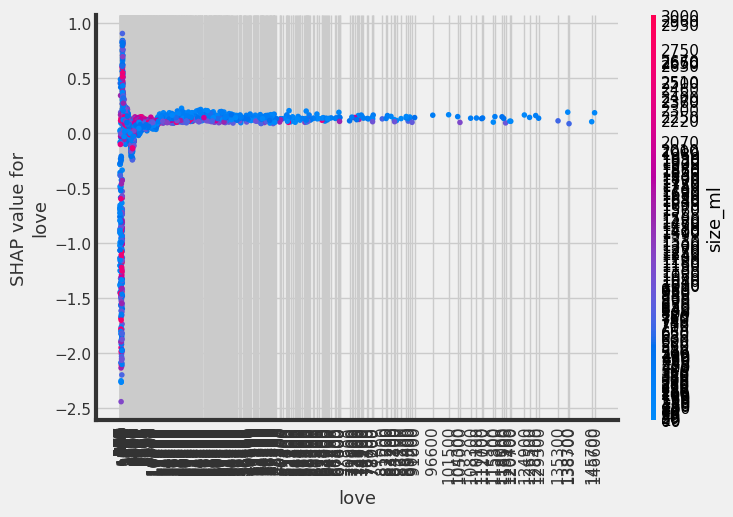

In [52]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=5,
                              shap_dict=shap_slearner, 
                              features=feature_names)

#### T Learner

In [53]:
tlearner = XGBTRegressor(control_name=0)
tlearner.estimate_ate(X=X, treatment=w_multi, y=y)

(array([-0.20553495]), array([-0.40748533]), array([-0.00358457]))

In [54]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)

#### Feature Importance (method = auto)

In [55]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{1: number_of_reviews      0.295273
 price                  0.254661
 love                   0.253050
 size_ml                0.171321
 exclusive              0.017363
 MarketingFlags_True    0.008332
 dtype: float64}

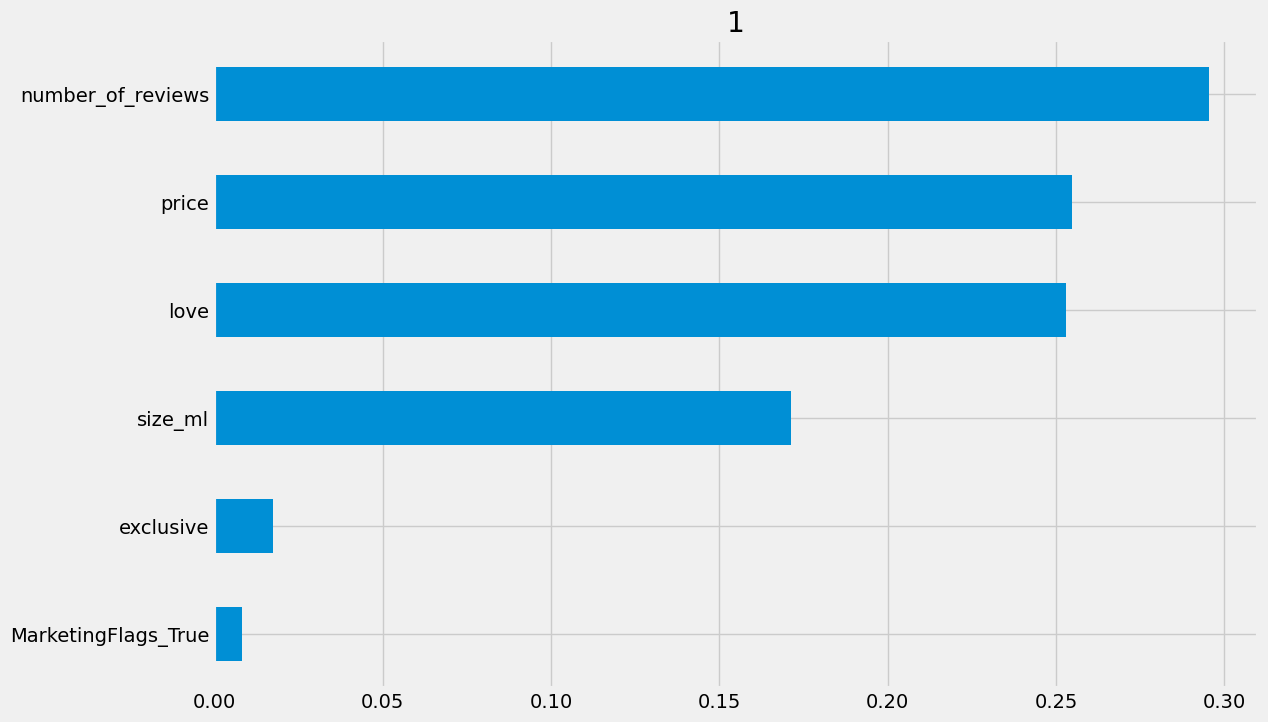

In [56]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### Feature Importance (method = permutation)

In [57]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{1: number_of_reviews      0.367867
 price                  0.338918
 love                   0.293911
 size_ml                0.151929
 exclusive              0.044352
 MarketingFlags_True    0.006102
 dtype: float64}

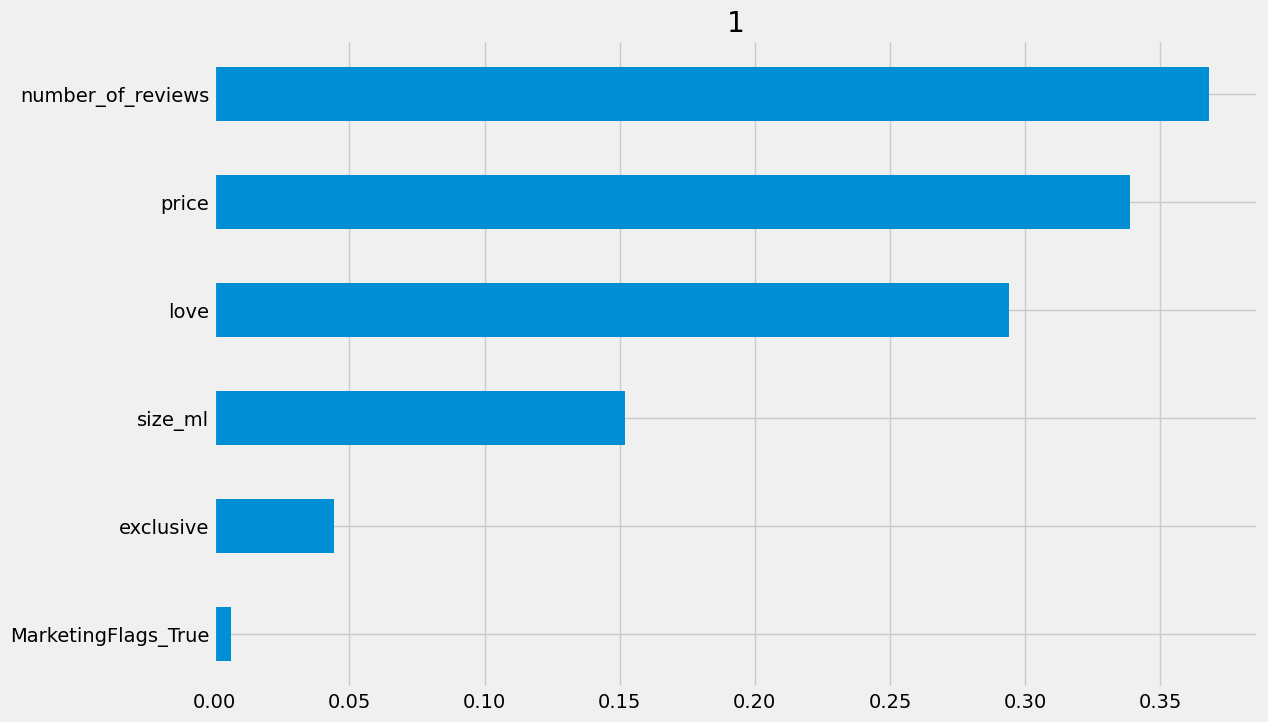

In [58]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Feature Importance (sklearn.inspection.permutation_importance)

In [59]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.5143661499023438 seconds


In [60]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

number_of_reviews      0.367867
price                  0.338918
love                   0.293911
size_ml                0.151929
exclusive              0.044352
MarketingFlags_True    0.006102
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

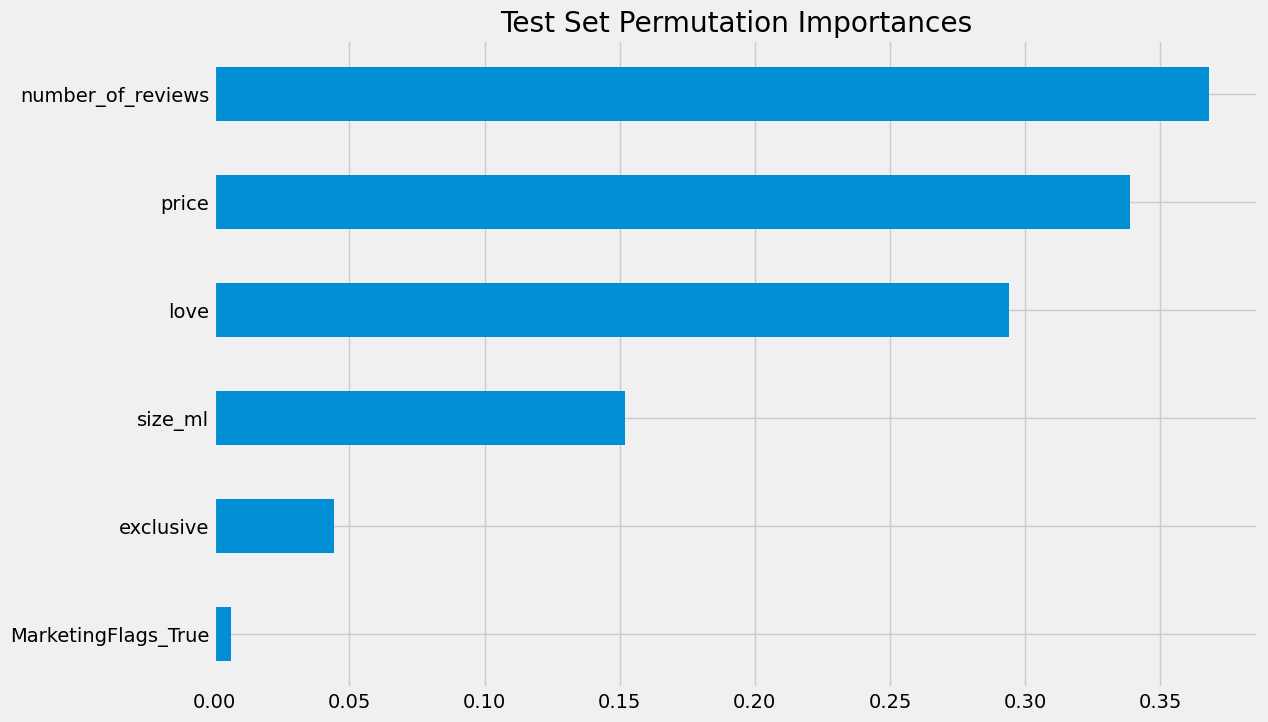

In [61]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

#### Shapley Values

In [62]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{1: array([[-1.56754107, -0.05196835,  3.21356437,  0.14482362,  0.07022711,
         -2.01681265],
        [ 1.16715171,  0.05238361,  1.27536812,  0.11657794, -0.03703688,
          1.29414784],
        [ 1.19479562,  0.35738578, -1.0969104 ,  0.21628323,  0.01248622,
          0.48243814],
        ...,
        [-0.30871131,  0.04619682, -1.16609969, -0.98533774,  0.01036527,
         -2.31917441],
        [ 1.9429237 ,  0.35827166, -0.88876337, -1.6394291 , -0.02019221,
         -0.85991125],
        [ 1.17263711,  0.0508605 ,  2.54174213, -2.08724203, -0.00925944,
         -0.71854386]])}

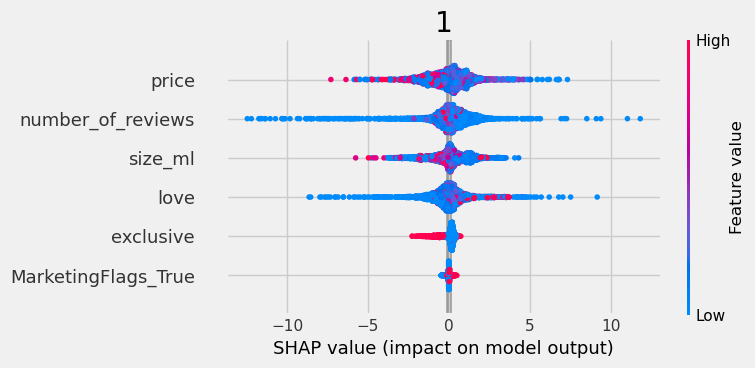

In [63]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

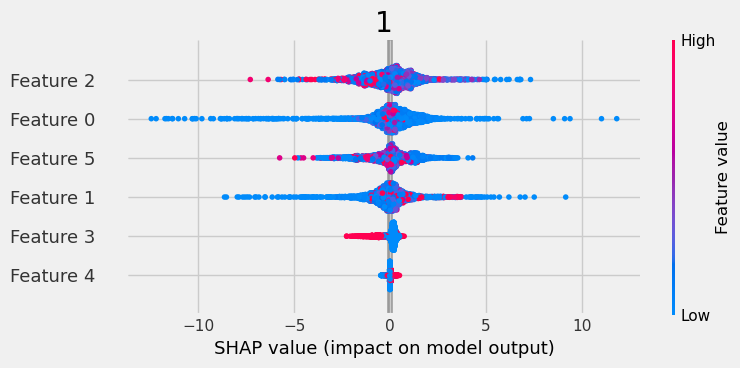

In [64]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

### Treatment 2: 'exclusive'

We are going to check how the effect of the treatment "exclusive" acts on the rest of the variables

#### Define the treatment, control, and target variables

In [65]:
X = df
# Define the treatment variable

w_multi = X['exclusive']
w_multi = w_multi.to_numpy()
w_multi = w_multi.astype(int)


# Define the outcome variable
y = X['rating']
y = y.to_numpy()
y = y.astype(float)


# Define the covariates
X = X.drop(['rating', 'exclusive', 'brand', 'category'], axis=1)
X = X.to_numpy()

In [66]:
feature_names = ['number_of_reviews', 'love', 'price',
                 'online_only', 'MarketingFlags_True', 'size_ml']

#### S learner

In [67]:
base_algo = LGBMRegressor()

slearner = BaseSRegressor(base_algo, control_name=0)
slearner.estimate_ate(X, w_multi, y)

array([-0.15352678])

In [68]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

#### Feature Importance (method = auto)

In [69]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{1: number_of_reviews      0.342652
 price                  0.260596
 size_ml                0.212729
 love                   0.175826
 MarketingFlags_True    0.006425
 online_only            0.001772
 dtype: float64}

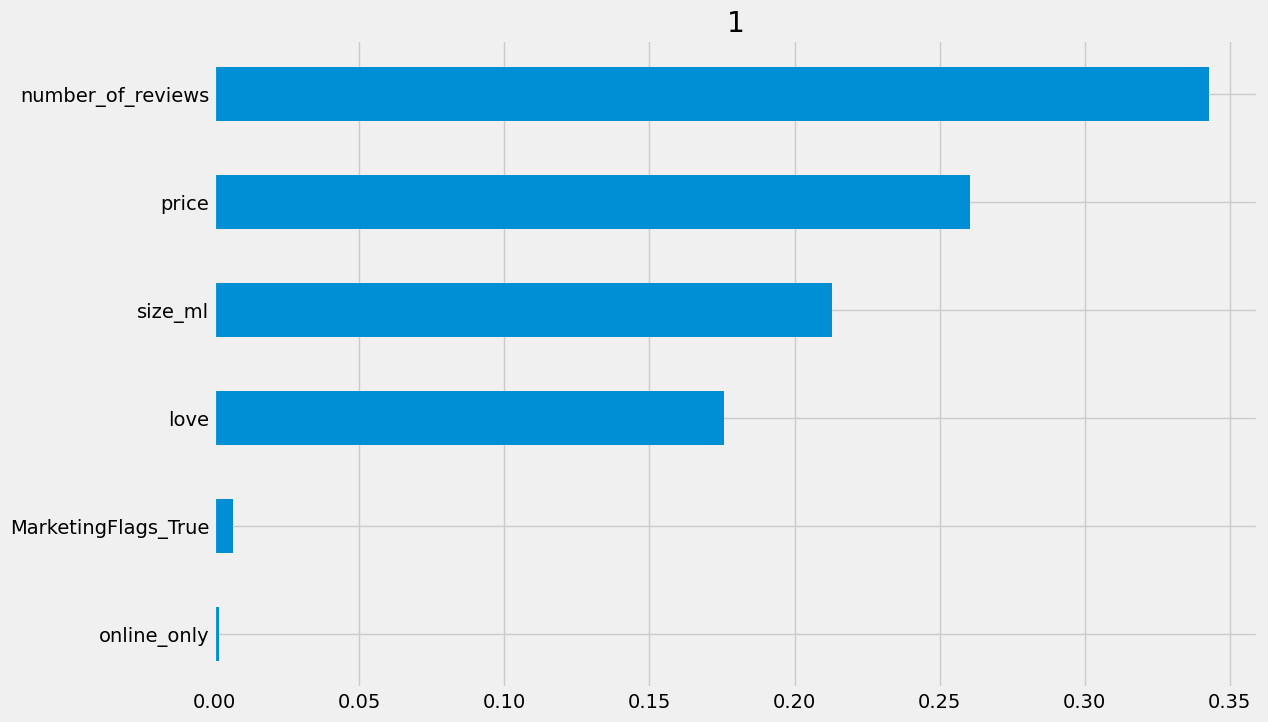

In [70]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### Feature Importance (method = permutation)

In [71]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{1: number_of_reviews      0.873387
 price                  0.616925
 size_ml                0.552229
 love                   0.351045
 MarketingFlags_True    0.008632
 online_only            0.002728
 dtype: float64}

In [72]:
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 1.0308988094329834 seconds


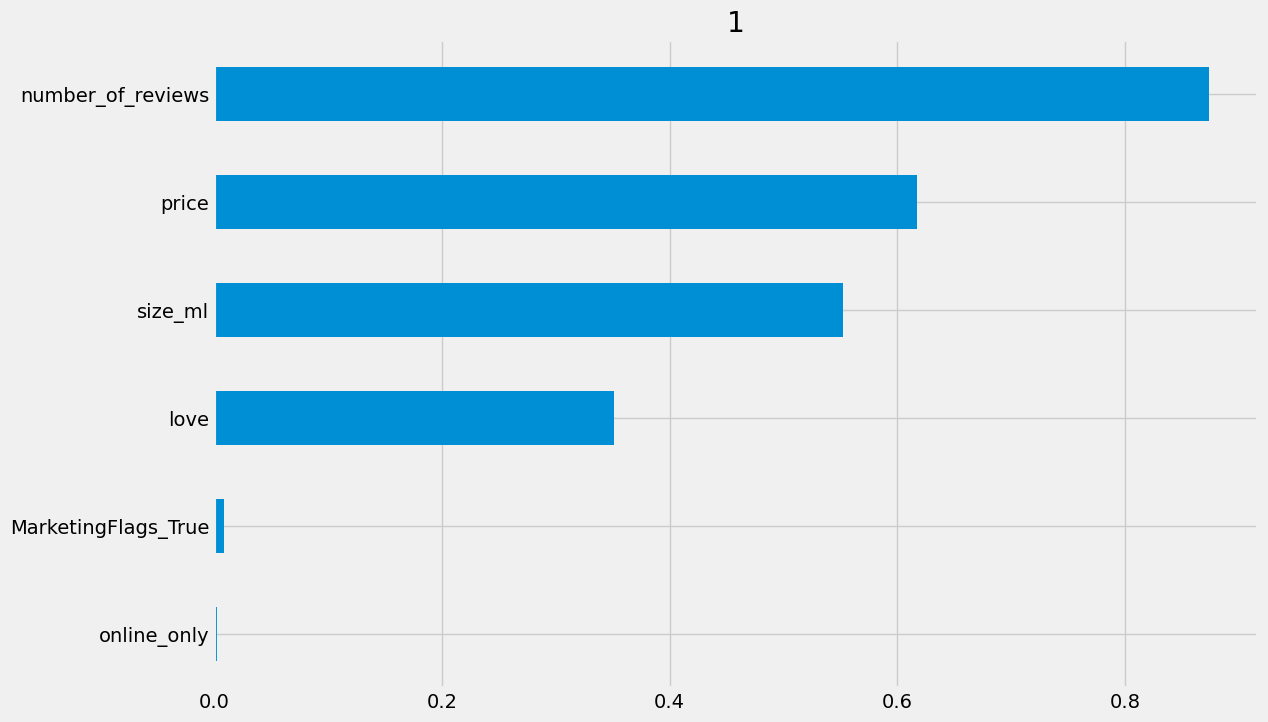

In [73]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Feature Importance (sklearn.inspection.permutation_importance)

In [74]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.9642620086669922 seconds


In [75]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

number_of_reviews      0.873387
price                  0.616925
size_ml                0.552229
love                   0.351045
MarketingFlags_True    0.008632
online_only            0.002728
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

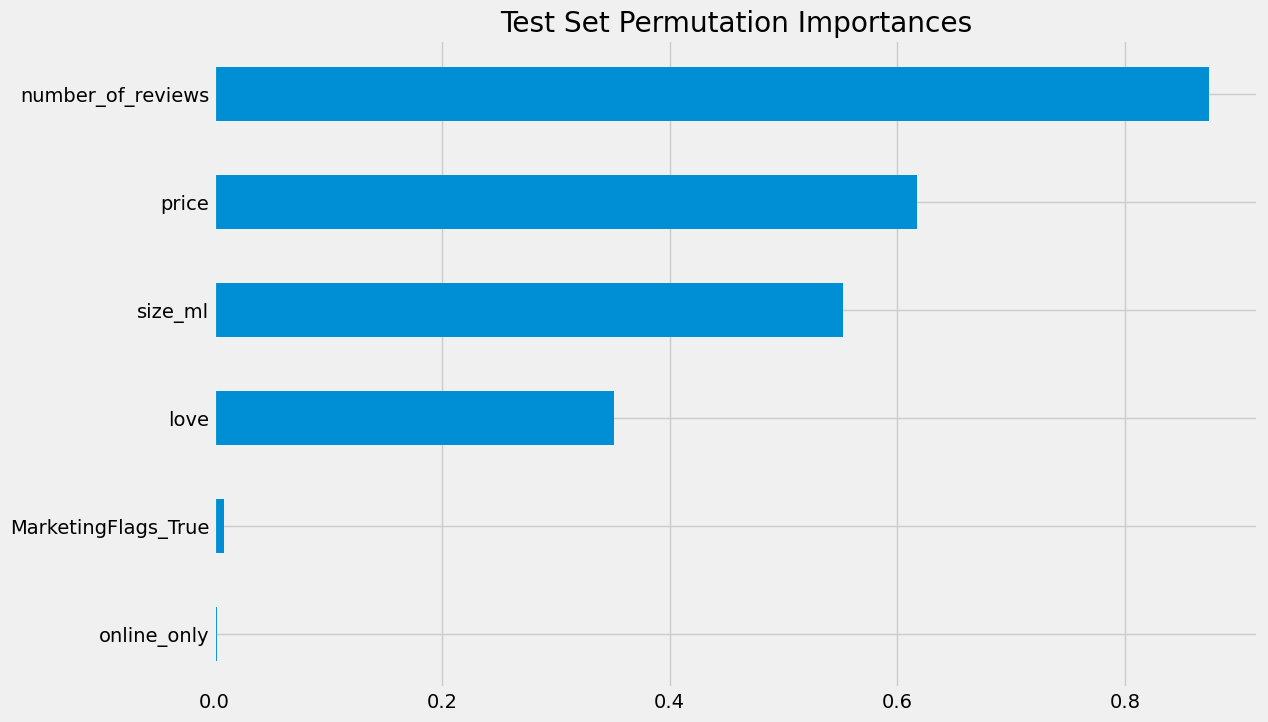

In [76]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [77]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

number_of_reviews      0.971562
price                  0.654243
size_ml                0.602513
love                   0.340610
MarketingFlags_True    0.008607
online_only            0.005075
dtype: float64

Text(0.5, 1.0, 'Training Set Permutation Importances')

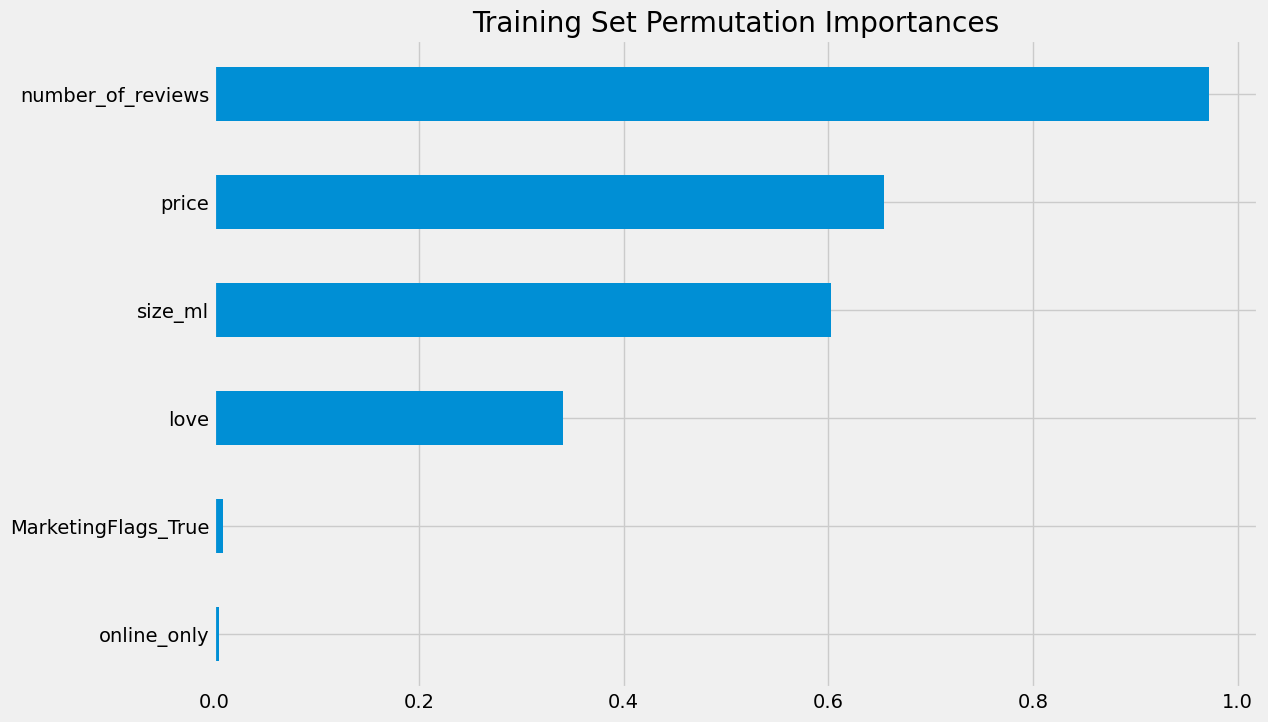

In [78]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Training Set Permutation Importances')

#### Shapley Values

In [79]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{1: array([[-4.28954275e-01,  1.19503581e-02, -1.37343919e-01,
          5.27530151e-03, -1.28912722e-02,  2.74100075e-01],
        [ 4.74230558e-01,  1.32682292e-01, -7.23398386e-02,
          6.85355435e-03, -1.76310590e-02,  4.50344414e-01],
        [-4.70458740e-02, -1.07746509e-01,  2.24488130e-01,
          1.68389183e-02, -2.23383673e-02, -3.06817816e-01],
        ...,
        [ 1.37795771e-01, -4.95066909e-04,  2.65527185e-01,
         -3.66047764e-03, -4.39063572e-03, -1.55801720e-01],
        [ 1.02230560e-02,  9.38112265e-02,  5.36994503e-01,
          8.16986139e-03, -1.17649478e-02, -2.79789313e-01],
        [-1.29302114e-01,  6.02911323e-02,  4.25826432e-01,
          1.10656915e-02, -2.70756689e-02, -1.20122457e-01]])}

In [80]:
np.mean(np.abs(shap_slearner[1]),axis=0)

array([0.24225576, 0.09628187, 0.14524385, 0.00492723, 0.01416379,
       0.1831826 ])

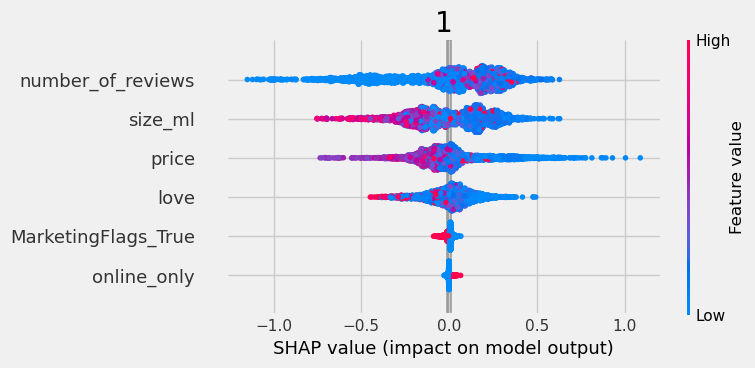

In [81]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

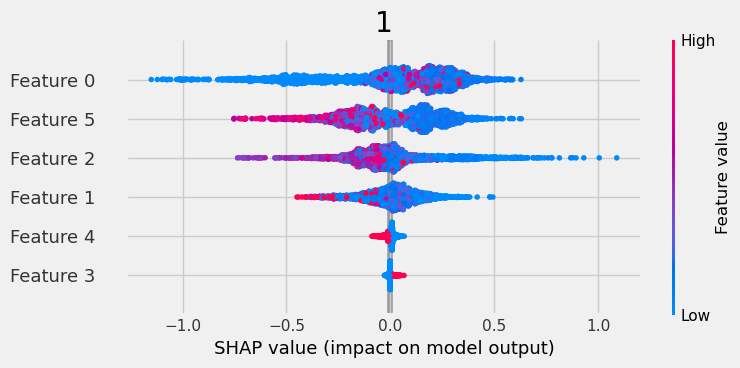

In [82]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

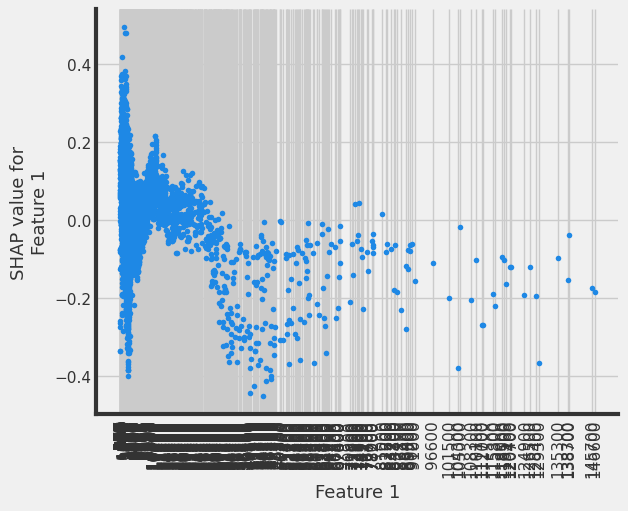

In [83]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

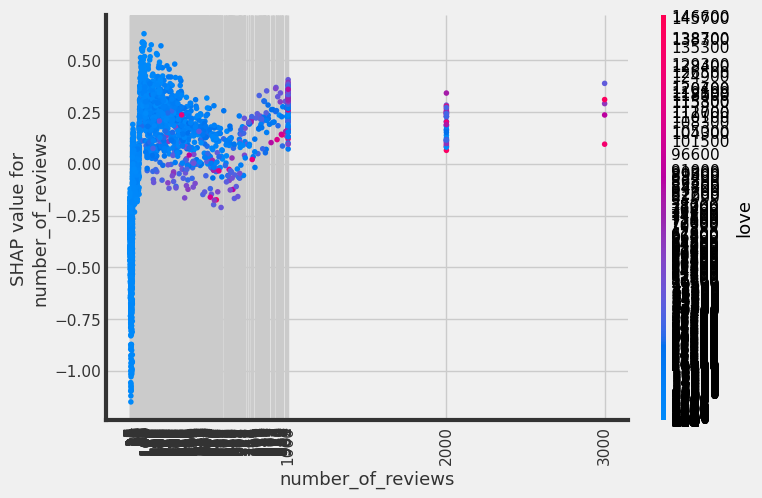

In [84]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx='number_of_reviews',
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

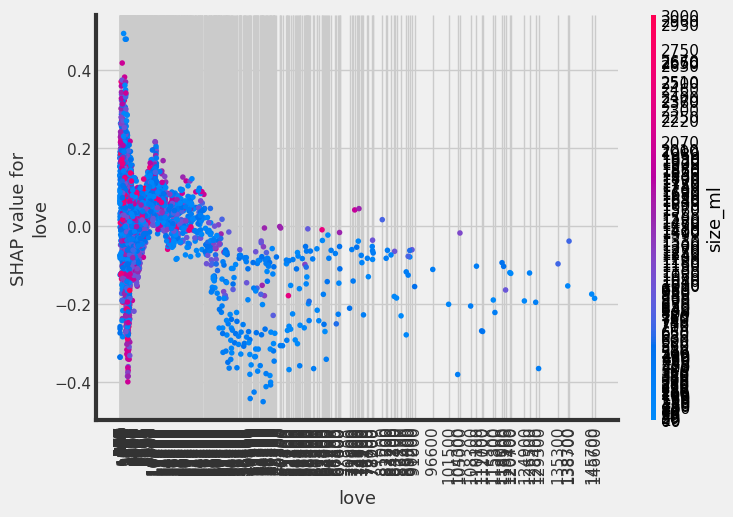

In [85]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group=1,
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=5,
                              shap_dict=shap_slearner, 
                              features=feature_names)

#### T Learner

In [86]:
tlearner = XGBTRegressor(control_name=0)
tlearner.estimate_ate(X=X, treatment=w_multi, y=y)

(array([0.10888859]), array([-0.09398395]), array([0.31176113]))

In [87]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)

#### Feature Importance (method = auto)

In [88]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{1: price                  0.310176
 love                   0.307594
 number_of_reviews      0.196588
 size_ml                0.159810
 online_only            0.018883
 MarketingFlags_True    0.006949
 dtype: float64}

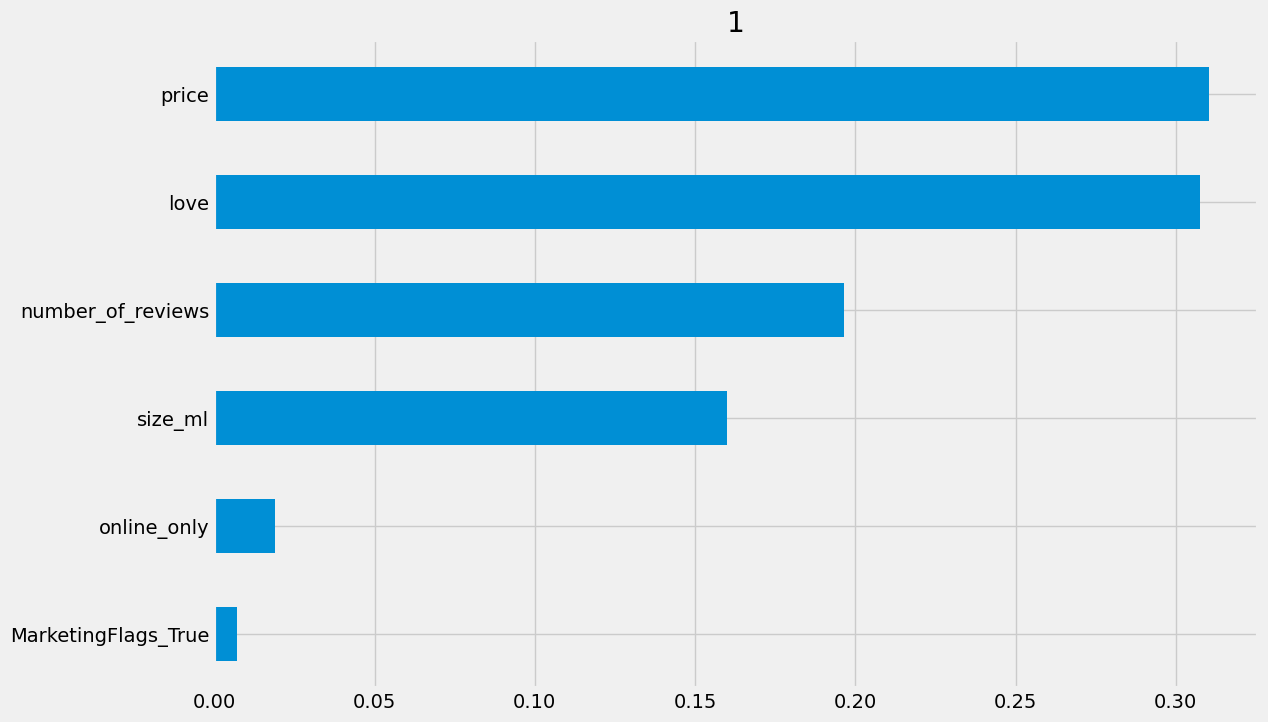

In [89]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### Feature Importance (method = permutation)

In [90]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{1: price                  0.375125
 love                   0.266937
 number_of_reviews      0.203051
 size_ml                0.163321
 online_only            0.011866
 MarketingFlags_True   -0.008194
 dtype: float64}

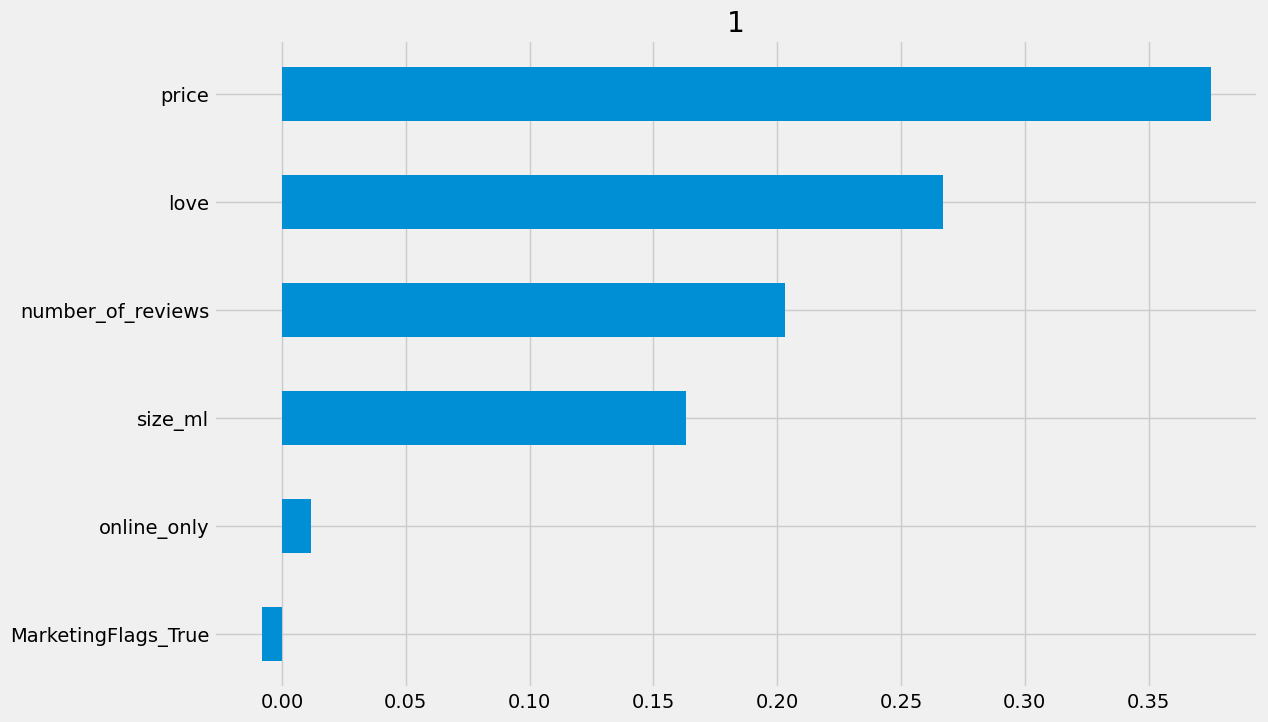

In [91]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Feature Importance (sklearn.inspection.permutation_importance)

In [92]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 1.4474339485168457 seconds


In [93]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

price                  0.375125
love                   0.266937
number_of_reviews      0.203051
size_ml                0.163321
online_only            0.011866
MarketingFlags_True   -0.008194
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

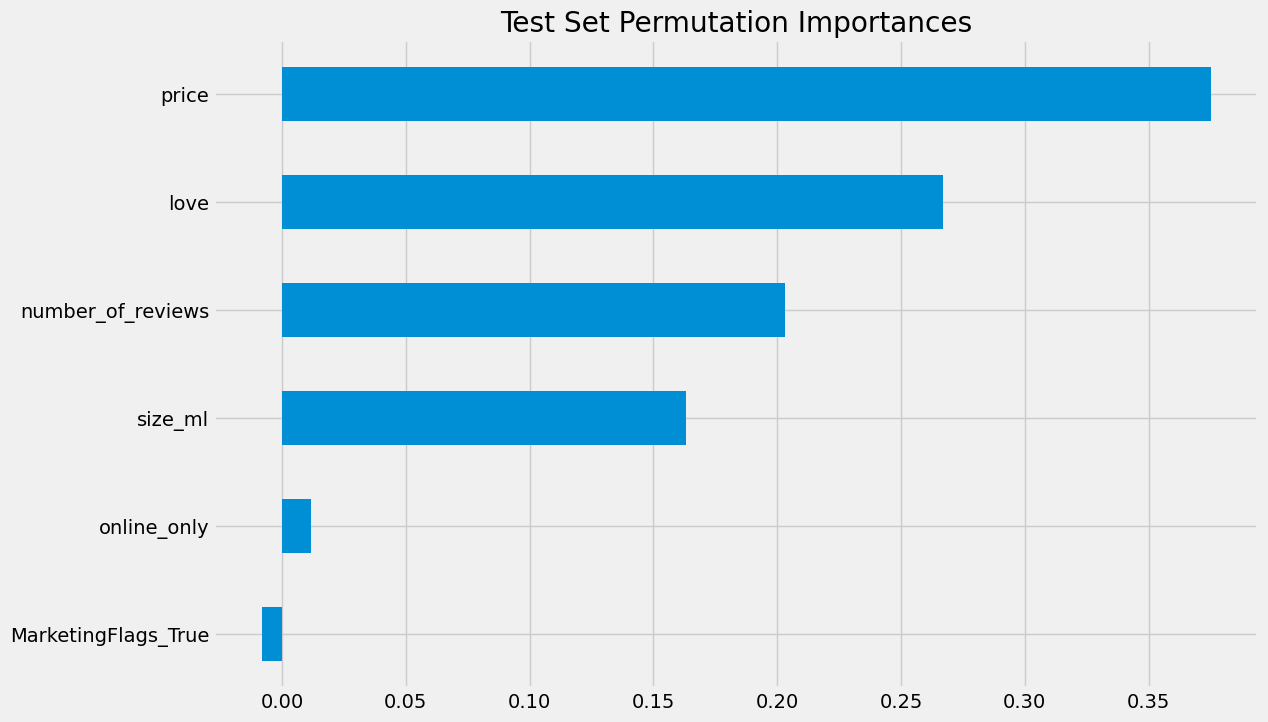

In [94]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

#### Shapley Values

In [95]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{1: array([[-3.51961243,  0.06459565,  0.06248681, -1.60926597, -0.0832516 ,
          1.81292832],
        [ 1.40526279,  0.15977435, -0.29300901, -1.07979925, -0.01921148,
          2.4725719 ],
        [-0.30257379, -0.34271865, -0.13903914, -0.54439784, -0.01069724,
         -0.84426831],
        ...,
        [-0.6000682 , -1.12066376,  3.59078828,  0.34047846,  0.11264491,
         -0.21335372],
        [-0.17695166, -1.35833231,  2.41519654, -1.54626784,  0.01983545,
         -1.22275585],
        [ 0.14430102, -1.92304133,  6.41379469, -1.86706136, -0.00866994,
         -0.7618622 ]])}

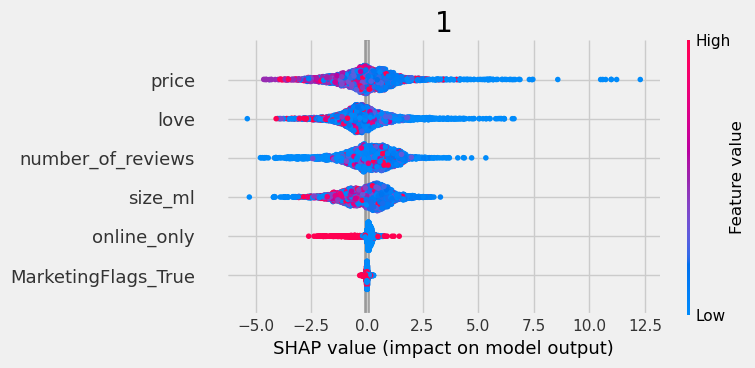

In [96]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

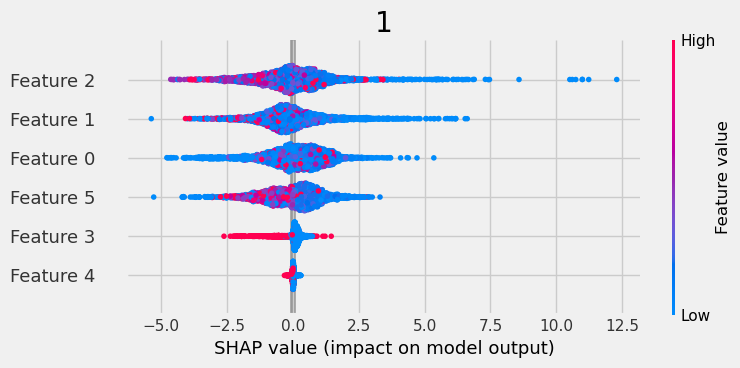

In [97]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

### Calculate Individual Treatment Effect (ITE/CATE)

#### 1. Treatment A: Online only

In [98]:
X = df
# Define the treatment variable

w_multi = X['online_only']
w_multi = w_multi.to_numpy()
w_multi = w_multi.astype(int)


# Define the outcome variable
y = X['rating']
y = y.to_numpy()
y = y.astype(float)


# Define the covariates
X = X.drop(['rating', 'online_only', 'brand', 'category'], axis=1)
X = X.to_numpy()

feature_names = ['number_of_reviews', 'love', 'price',
                 'exclusive', 'MarketingFlags_True', 'size_ml']

In [99]:
# Convert X to a numerical array
X = np.array(X, dtype=np.float64)

# Convert y to a numerical array
y = np.array(y, dtype=np.float64)

# Convert w_multi to a numerical array
w_multi = np.array(w_multi, dtype=np.float64)


In [100]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor

In [101]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=w_multi, y=y)

# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=w_multi, y=y)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=w_multi, y=y)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=w_multi, y=y)

In [102]:
# Average ITE for S learner
print(np.mean(cate_s[1] - cate_s[0]))

0.0


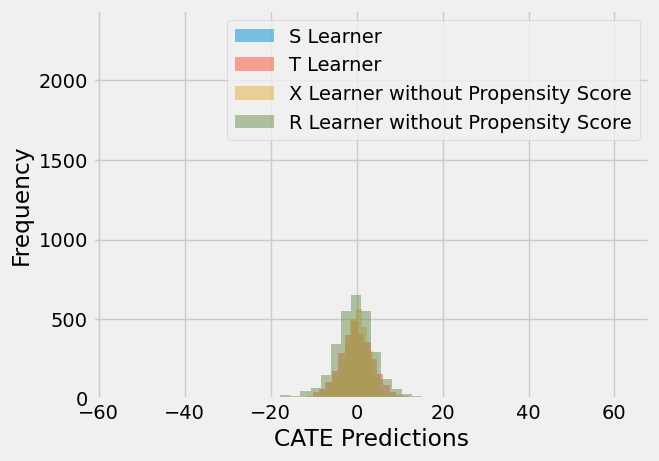

In [103]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histograms of the CATE predictions
ax.hist(cate_s, label='S Learner', alpha=0.5, bins=50)
ax.hist(cate_t, label='T Learner', alpha=0.5, bins=50)
ax.hist(cate_x_no_p, label='X Learner without Propensity Score', alpha=0.5, bins=50)
ax.hist(cate_r_no_p, label='R Learner without Propensity Score', alpha=0.5, bins=50)

# Add a legend
ax.legend()

# Add x and y labels
ax.set_xlabel('CATE Predictions')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

Evaluate the performance of each learner

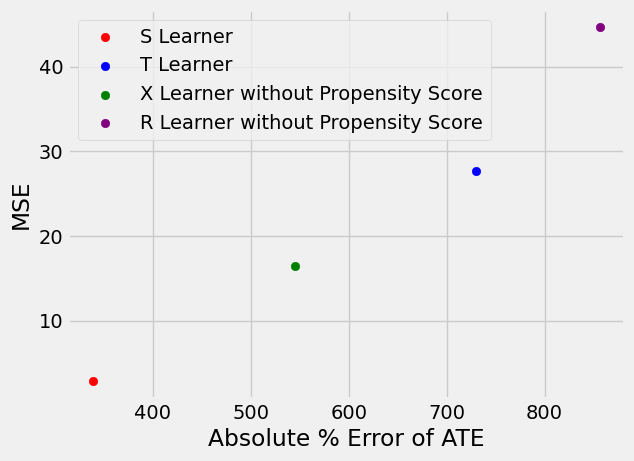

In [104]:
# Ground truth ATE
true_ate = 0.5

# Calculate MSE and APE for each learner
mse_s = ((cate_s - true_ate) ** 2).mean()
ape_s = np.mean(np.abs(cate_s - true_ate) / true_ate)

mse_t = ((cate_t - true_ate) ** 2).mean()
ape_t = np.mean(np.abs(cate_t - true_ate) / true_ate)

mse_x_no_p = ((cate_x_no_p - true_ate) ** 2).mean()
ape_x_no_p = np.mean(np.abs(cate_x_no_p - true_ate) / true_ate)

mse_r_no_p = ((cate_r_no_p - true_ate) ** 2).mean()
ape_r_no_p = np.mean(np.abs(cate_r_no_p - true_ate) / true_ate)

# Create a scatter plot of MSE vs APE
fig, ax = plt.subplots()
ax.scatter(ape_s * 100, mse_s, label='S Learner', color='red')
ax.scatter(ape_t * 100, mse_t, label='T Learner', color='blue')
ax.scatter(ape_x_no_p * 100, mse_x_no_p, label='X Learner without Propensity Score', color='green')
ax.scatter(ape_r_no_p * 100, mse_r_no_p, label='R Learner without Propensity Score', color='purple')
ax.set_xlabel('Absolute % Error of ATE')
ax.set_ylabel('MSE')
ax.legend()
plt.show()


#### 1. Treatment B: Exclusive

In [105]:
X = df
# Define the treatment variable

w_multi = X['exclusive']
w_multi = w_multi.to_numpy()
w_multi = w_multi.astype(int)


# Define the outcome variable
y = X['rating']
y = y.to_numpy()
y = y.astype(float)


# Define the covariates
X = X.drop(['rating', 'exclusive', 'brand', 'category'], axis=1)
X = X.to_numpy()

feature_names = ['number_of_reviews', 'love', 'price',
                 'online_only', 'MarketingFlags_True', 'size_ml']

In [106]:
# Convert X to a numerical array
X = np.array(X, dtype=np.float64)

# Convert y to a numerical array
y = np.array(y, dtype=np.float64)

# Convert w_multi to a numerical array
w_multi = np.array(w_multi, dtype=np.float64)


In [107]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor

In [108]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=w_multi, y=y)

# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=w_multi, y=y)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=w_multi, y=y)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=w_multi, y=y)

In [109]:
# Average ITE for S learner
print(np.mean(cate_s[1] - cate_s[0]))

-7.105427357601002e-15


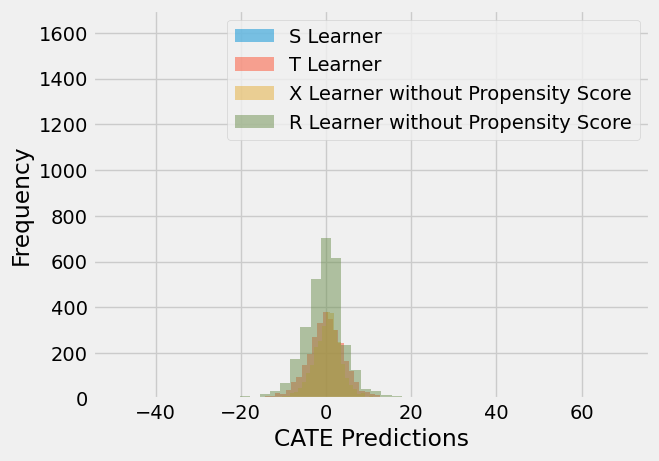

In [110]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histograms of the CATE predictions
ax.hist(cate_s, label='S Learner', alpha=0.5, bins=50)
ax.hist(cate_t, label='T Learner', alpha=0.5, bins=50)
ax.hist(cate_x_no_p, label='X Learner without Propensity Score', alpha=0.5, bins=50)
ax.hist(cate_r_no_p, label='R Learner without Propensity Score', alpha=0.5, bins=50)

# Add a legend
ax.legend()

# Add x and y labels
ax.set_xlabel('CATE Predictions')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

Evaluate the performance of each learner

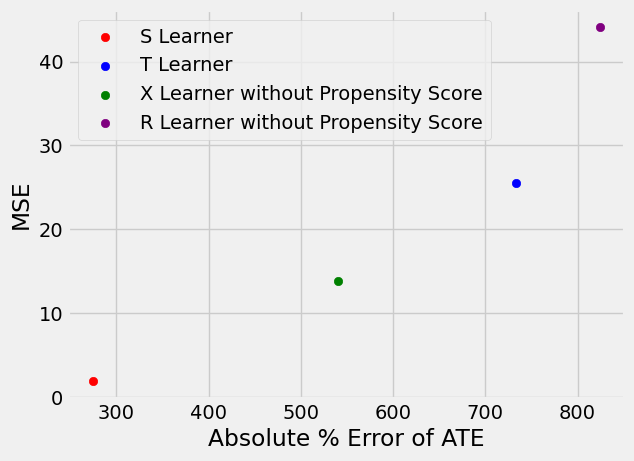

In [111]:
# Ground truth ATE
true_ate = 0.5

# Calculate MSE and APE for each learner
mse_s = ((cate_s - true_ate) ** 2).mean()
ape_s = np.mean(np.abs(cate_s - true_ate) / true_ate)

mse_t = ((cate_t - true_ate) ** 2).mean()
ape_t = np.mean(np.abs(cate_t - true_ate) / true_ate)

mse_x_no_p = ((cate_x_no_p - true_ate) ** 2).mean()
ape_x_no_p = np.mean(np.abs(cate_x_no_p - true_ate) / true_ate)

mse_r_no_p = ((cate_r_no_p - true_ate) ** 2).mean()
ape_r_no_p = np.mean(np.abs(cate_r_no_p - true_ate) / true_ate)

# Create a scatter plot of MSE vs APE
fig, ax = plt.subplots()
ax.scatter(ape_s * 100, mse_s, label='S Learner', color='red')
ax.scatter(ape_t * 100, mse_t, label='T Learner', color='blue')
ax.scatter(ape_x_no_p * 100, mse_x_no_p, label='X Learner without Propensity Score', color='green')
ax.scatter(ape_r_no_p * 100, mse_r_no_p, label='R Learner without Propensity Score', color='purple')
ax.set_xlabel('Absolute % Error of ATE')
ax.set_ylabel('MSE')
ax.legend()
plt.show()


## VI. Conclusion

S learner and T learner are two different algorithms used for estimating the average treatment effect (ATE) in causal inference. The main difference between them lies in the way they model the relationship between the treatment, covariates, and the outcome.

S learner uses a supervised learning approach, where the model is trained to predict the outcome variable based on the treatment assignment and the covariates. The average treatment effect is estimated by subtracting the predicted outcome for the treated group from the predicted outcome for the control group.

T learner, on the other hand, uses a two-step approach. In the first step, two separate models are trained for the treated and control groups, using only the covariates as input. In the second step, the predicted outcome for each model is combined to estimate the average treatment effect.

In general, S-learners are suitable when the assumption of no unmeasured confounding is reasonable. S-learners are designed to estimate the average treatment effect of the treated (ATT), which is the average effect of the treatment on individuals who receive it. They are also well-suited when the treatment assignment is binary and there are many covariates.

On the other hand, T-learners are suitable when the assumption of no unmeasured confounding is not reasonable, or when there is a large amount of missing data. T-learners are designed to estimate the average treatment effect (ATE), which is the average effect of the treatment across the entire population, including individuals who do and do not receive it.


#### Causal Inference using the S learner (LGBMRegressor)

An S learner using LGBMRegressor is a machine learning model that uses semi-supervised learning and gradient boosting to perform regression tasks.

Based on the feature importance values, you can see that 'number_of_reviews' is the most important feature, followed by 'love' and 'price'. The other features, 'exclusive', 'MarketingFlags_True', and 'size_ml', have lower feature importance values.

The estimate of the average treatment effect (ATE) of the treatment 'online_only' on the outcome 'rating' is -0.24317993. The ATE represents the average difference in the outcome 'rating' between individuals who receive the treatment ('online_only' = 1) and those who do not receive the treatment ('online_only' = 0).

In this case, a negative ATE value of -0.24317993 indicates that, on average, individuals who receive the treatment 'online_only' have a lower rating compared to those who do not receive the treatment. This suggests that, on average, offering a product only online may have a negative impact on its rating compared to offering it both online and in-store.

The mean absolute SHAP values for each feature represent the average magnitude of the contribution of that feature to the predictions for the instances in the second treatment group. A higher mean absolute SHAP value for a feature indicates that the feature has a higher average contribution to the predictions for the instances in the second treatment group.

In this case, the highest mean absolute SHAP value is for the feature number_of_reviews (0.22497292), followed by the feature love (0.20661489), and the feature size_ml (0.12512934). This suggests that these three features have the highest average contribution to the predictions for the instances in the second treatment group. The remaining features have lower mean absolute SHAP values, indicating that they have a smaller average contribution to the predictions for the instances in the second treatment group.


####  Causal Inference using the T learner (XGBRegressor)

The T-learner is constructed by training two separate models, one for each treatment group. One model is trained on the treated instances, while the other is trained on the control instances. The predictions of these two models are then combined to estimate the treatment effect.

The code tlearner.estimate_ate(X=X, treatment=w_multi, y=y) is calling the estimate_ate method on the T-learner instance tlearner. The method calculates the Average Treatment Effect (ATE) of the binary treatment variable w_multi on the outcome variable y using the covariates in X.

The result of this method call is a tuple of three values, which represent the following:

-	The ATE estimate: array([-0.20553495])
-	The standard error of the ATE estimate: array([-0.40748533])
-	The t-statistic of the ATE estimate: array([-0.00358457])

In this case, the ATE estimate is -0.20553495, which suggests that the treatment has a negative effect on the outcome variable, on average. The standard error is -0.40748533, which is a measure of the uncertainty in this estimate. The t-statistic is -0.00358457, which is small, indicating that there is weak evidence for the ATE estimate.

This suggests that the treatment has a negative effect on the outcome variable, but the evidence is not strong enough to draw a definitive conclusion.

The results from feature importance analysis using the T learner suggest that the number of reviews, price, and love have the greatest impact on the treatment effect, while the features exclusive and MarketingFlags_True have little to no impact.

Regarding SHAP values, the highest contributing feature to the prediction is "price", followed by "number_of_reviews", "size_ml", "love", "exclusive", and "Marketing_flags_true". This means that these features have the highest impact on the prediction made by the XGBTRegressor model.

The same kind of conclusion can be drawn from the second treatment, ‘exclusive’, when a product is categorized as being exclusive for a limited amount of time. 

####  Individual Treatment Effect (ITE) analysis:

The ITE is a measure of the difference in the outcome of a target individual, if they had received the treatment, versus if they had not received the treatment. We can see from the distribution graph of the ITE that this metric is normally distributes among our observations.

For the first treatment, the average ITE using the S learner is equal to 0. A mean ITE equal to 0 means that on average, the treatment (in this case, the "online_only" variable) has no effect on the outcome (in this case, the "rating" variable). This means that for the population as a whole, the treatment does not have a significant impact on the outcome. It does not necessarily mean that the treatment has no effect for any individual, but that on average across all individuals, the effect is not significant.

For the second treatment, the average ITE using the S learner is equal to -7.105 x 10^-15, which is also very close to 0. Therefore, the same conclusion can be drawn for exclusive products.

#### Evaluating learners performances:

Finally, when it comes to evaluating the performance of each learner, I plotted an MSE / Absolute % Error of ATE scatter plot for the S learner and the T learner. I added to that the X and R learners, which could be interesting to use too. From this graph, we can see that the most interesting learned to use is the S one, as it has the lowest MSE/ Absolute % Error of ATE ratio. It is then followed by the X learner, the T learner, and R learner.

X-learner is a machine learning algorithm used in causal inference to estimate the individual treatment effect (ITE) of a binary treatment. It would have therefore been interesting to use. However, the S learner seems to give us much more accurate results, which is why we should go with the S learner to perform our task.

